In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la

In [2]:
data = np.load("../data/data.npz")
scattpos = np.load("../data/data.npz")["scattpos"]

In [3]:
print(scattpos)
for i in range(scattpos.shape[0]):
    print(la.norm(scattpos[i, :]))

[[-0.51123588  1.2308535   1.33280248]
 [ 2.13140087 -2.7248888   3.45946364]
 [-0.60135626 -0.39563291  0.71982967]
 [ 0.06595943 -1.48433931 -1.4858041 ]]
1.8848673455730072
4.892420398348613
1.01799288198001
2.101244313964721


Text(0, 0.5, 'P')

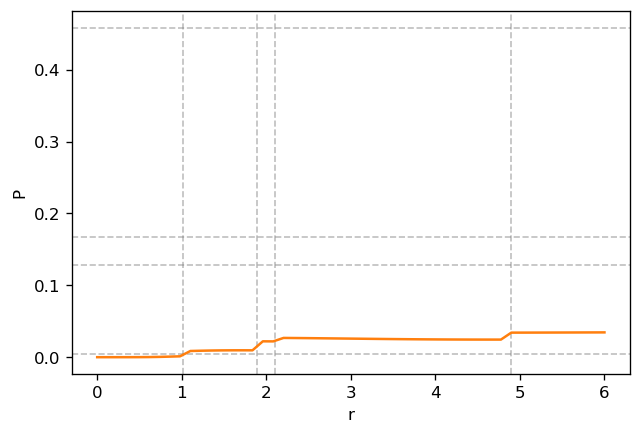

In [4]:
plt.figure(dpi=120)

for i in range(scattpos.shape[0]):
    plt.axvline(la.norm(scattpos[i, :]), color="gray", alpha=0.5, linewidth='1', linestyle='dashed')
    plt.axhline(data["analyticalsum"][i], color="gray", alpha=0.5, linewidth='1', linestyle='dashed')
plt.plot(data["r"], data["P"], color="C1")

plt.xlabel("r")
plt.ylabel("P")